<center><H1><b> Анализ данных с сайта </b></H1>



## 1. Парсинг сайта

In [1]:
#загрузка необходимых библиотек
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
def write_parse_data(data):
    with open('auto.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow((data['name'],
                         data['url'],
                         data['run'],
                         data['tank_volume'],
                         data['horsepower'],
                         data['year'],
                         data['car_type'],
                         data['transmission_type'],
                         data['retailer'],
                         data['phone'],
                         data['town'],
                         data['cur_price'],
                         data['first_price'],
                         data['diff_price_down']))

In [3]:
def get_text(car, tag, class_name):
    div = car.find(tag, class_= class_name)
    return div.getText("//")

In [717]:
def get_page_data(html):
    soup = BeautifulSoup(html, 'lxml')
    divs = soup.find('div', {"id": "serp"})
    cars = divs.find_all('div', class_='SerpSnippet_snippetContent__d8CHK')
    for car in cars:
        try:
            div = car.find('a', class_='SerpSnippet_name__3F7Yu SerpSnippet_titleText__1Ex8A blackLink')
            name = div.attrs['title']
        except:
            name = ''
        try:
            div = car.find('a', class_='SerpSnippet_photoWrapper__3W9J4')
            url = div.attrs['href']
        except:
            url = ''
        try:
            div = get_text(car, 'div', 'SerpSnippet_info__3_y7m')
            run, tank_volume, horsepower, year, car_type, transmission_type = div.split('//')
        except:
            run, tank_volume, horsepower, year, car_type, transmission_type = ['' for i in range(6)]
        try:
            div = get_text(car, 'div', 'SerpSnippet_bottomInfo__1zRMv')
            retailer, phone, temp_field, town = div.split('//')
        except:
            retailer, phone, temp_field, town = ['' for i in range(4)]
        try:
            div = get_text(car, 'div', 'SerpSnippet_topInfoRight__pG1ha')
            cur_price = int(div.split('//')[0].replace(" ", ""))
            if len(div.split('//')) > 2:
                first_price = int(div.split('//')[1].replace("\u2009", ""))
                diff_price_down = int( div.split('//')[-1].replace("\u2009", ""))
            elif len(div.split('//')) > 1:
                first_price = int(div.split('//')[1].replace("\u2009", ""))
                diff_price_down = 0
            else:
                first_price, diff_price_down = 0, 0 
                
        except:
            cur_price, first_price, diff_price_down = 0, 0, 0

        data = {
            'name':name,
            'url':url,
            'run':run,
            'tank_volume':tank_volume,
            'horsepower':horsepower,
            'year':year,
            'car_type':car_type,
            'transmission_type':transmission_type,
            'retailer':retailer,
            'phone':phone,
            'town':town,
            'cur_price':cur_price,
            'first_price':first_price,
            'diff_price_down':diff_price_down
       }
        write_parse_data(data)

In [725]:
def parse_main():
    base_url = "https://auto.youla.ru/"
    sort_part = 'moskva/cars/'
    page_part = "?page="
    for i in range(1,900):
        url = base_url + sort_part  + page_part + str(i) + '#serp'
        response = requests.get(url)
        html = response.text
        get_page_data(html)
        print(i, url)

In [724]:
parse_main()

522 https://auto.youla.ru/moskva/cars/?page=522#serp
523 https://auto.youla.ru/moskva/cars/?page=523#serp
524 https://auto.youla.ru/moskva/cars/?page=524#serp
525 https://auto.youla.ru/moskva/cars/?page=525#serp
526 https://auto.youla.ru/moskva/cars/?page=526#serp
527 https://auto.youla.ru/moskva/cars/?page=527#serp
528 https://auto.youla.ru/moskva/cars/?page=528#serp
529 https://auto.youla.ru/moskva/cars/?page=529#serp
530 https://auto.youla.ru/moskva/cars/?page=530#serp
531 https://auto.youla.ru/moskva/cars/?page=531#serp
532 https://auto.youla.ru/moskva/cars/?page=532#serp
533 https://auto.youla.ru/moskva/cars/?page=533#serp
534 https://auto.youla.ru/moskva/cars/?page=534#serp
535 https://auto.youla.ru/moskva/cars/?page=535#serp
536 https://auto.youla.ru/moskva/cars/?page=536#serp
537 https://auto.youla.ru/moskva/cars/?page=537#serp
538 https://auto.youla.ru/moskva/cars/?page=538#serp
539 https://auto.youla.ru/moskva/cars/?page=539#serp
540 https://auto.youla.ru/moskva/cars/?page=54

677 https://auto.youla.ru/moskva/cars/?page=677#serp
678 https://auto.youla.ru/moskva/cars/?page=678#serp
679 https://auto.youla.ru/moskva/cars/?page=679#serp
680 https://auto.youla.ru/moskva/cars/?page=680#serp
681 https://auto.youla.ru/moskva/cars/?page=681#serp
682 https://auto.youla.ru/moskva/cars/?page=682#serp
683 https://auto.youla.ru/moskva/cars/?page=683#serp
684 https://auto.youla.ru/moskva/cars/?page=684#serp
685 https://auto.youla.ru/moskva/cars/?page=685#serp
686 https://auto.youla.ru/moskva/cars/?page=686#serp
687 https://auto.youla.ru/moskva/cars/?page=687#serp
688 https://auto.youla.ru/moskva/cars/?page=688#serp
689 https://auto.youla.ru/moskva/cars/?page=689#serp
690 https://auto.youla.ru/moskva/cars/?page=690#serp
691 https://auto.youla.ru/moskva/cars/?page=691#serp
692 https://auto.youla.ru/moskva/cars/?page=692#serp
693 https://auto.youla.ru/moskva/cars/?page=693#serp
694 https://auto.youla.ru/moskva/cars/?page=694#serp
695 https://auto.youla.ru/moskva/cars/?page=69

832 https://auto.youla.ru/moskva/cars/?page=832#serp
833 https://auto.youla.ru/moskva/cars/?page=833#serp
834 https://auto.youla.ru/moskva/cars/?page=834#serp
835 https://auto.youla.ru/moskva/cars/?page=835#serp
836 https://auto.youla.ru/moskva/cars/?page=836#serp
837 https://auto.youla.ru/moskva/cars/?page=837#serp
838 https://auto.youla.ru/moskva/cars/?page=838#serp
839 https://auto.youla.ru/moskva/cars/?page=839#serp
840 https://auto.youla.ru/moskva/cars/?page=840#serp
841 https://auto.youla.ru/moskva/cars/?page=841#serp
842 https://auto.youla.ru/moskva/cars/?page=842#serp
843 https://auto.youla.ru/moskva/cars/?page=843#serp
844 https://auto.youla.ru/moskva/cars/?page=844#serp
845 https://auto.youla.ru/moskva/cars/?page=845#serp
846 https://auto.youla.ru/moskva/cars/?page=846#serp
847 https://auto.youla.ru/moskva/cars/?page=847#serp
848 https://auto.youla.ru/moskva/cars/?page=848#serp
849 https://auto.youla.ru/moskva/cars/?page=849#serp
850 https://auto.youla.ru/moskva/cars/?page=85

## 2. Описание, анализ и визуализация данных:

В рассмотрении имеются следующие поля:
- name: Название объявления (содержит брэнд автомобиля и состояние)
- run: Пробег автомобиля
- fuel: Расход и тип топлива
- horsepower: Количество лошадиных сил
- year: Год выпуска
- car_type: Тип ('Седан', 'Хетчбэк' итп)
- transmission_type: Тип коробки передач
- retailer: Ритейлер
- phone: Телефон
- town: Город 
- cur_price: Текущая цена в объявлении о продаже
- first_price: Начальная цена в объявлении
- diff_price_down: Величина снижения цены

Некоторые из получнных признаков являются избыточными, например телефон. Такие признаки можно превратить в бинарные признаки (очевидно, что наличие телефона в объявлении влиять на эффективность объявления о продаже авто).
Поля brand и fuel получим из поля name

In [675]:
dt = pd.read_csv('auto.csv', names=['name', 'url','run', 'fuel', 'horsepower', 
                                    'year','car_type', 'transmission_type', 'retailer', 
                                    'phone', 'town', 'cur_price', 'first_price', 'diff_price_down', ])

In [676]:
dt.phone.isna().sum()

0

Предложений с незаполненным телефоном нет, поэтому эти данные не несут важную информацию о предложении => его можно удалить

In [677]:
dt = dt.drop('phone', axis = 1)

In [678]:
#заполним пропуски
dt.fillna('', inplace = True)

In [679]:
dt['brand'] = [name.split(' ')[0] for name in dt.name]
dt['cylinder_volume'] = [name.split(', ')[0].split(' ')[0] for name in dt.fuel]
dt['fuel'] = [name.split(', ')[-1] for name in dt.fuel]
dt['year'] = [name.split(' г.')[0] for name in dt.year]
dt['run'] = [run.split(' км')[0].replace(' ', '') for run in dt.run]
dt['horsepower'] = [horsepower.split(' л.с.')[0] for horsepower in dt.horsepower]

In [680]:
dt = dt.drop(['name', 'url', 'town'], axis = 1)

In [681]:
rus_names = ['Филипп', 'Лена', 'Сергей', 'Александр', 'Денис',
             'Дмитрий', 'Егор', 'Алик', 'Алишер', 'Коля', 'Джоник', 'Артем',
             'Виталий', 'Давид', 'Тема', 'Виктор', 'Иван', 'Игорь', 'Павел',
             'Иванов', 'Тамара', 'Дима', 'Юрий', 'Матвей', 'Алексей', 'Андрей',
             'Николай', 'Вячеслав', 'Никита', 'Наталья', 'Ринат', 'Олег',
             'Людмила', 'Татьяна',  'Михаил', 'Паша', 'Женя', 'Юлия', 'Евгений', 
             'Роман', 'Константин', 'Ака', 'Евгения', 'Наталия', 'Макс','Акмал', 
             'Максим', 'Кристина', 'Антон','Альберт', 'Савва', 'Вадим', 'Маргарита', 
             'Анна', 'Владимир', 'Дарья','Ольга', 'Самат', 'Семен','Али', 'Бек', 
             'Динара', 'Данил', 'Магомед', 'Юля', 'София', 'Таня', 'Аня',
             'Илья',  'Виктория', 'Жанна', 'Руслан', 'Алена','Валентина',
             'Екатерина', 'Валентин','Владислав','Жора', 'Ирина','Тимур', 
             'Елена', 'Эльвира',  'Василий','Вектор', 'Кирилл', 'Марина']

dt.loc[dt.retailer.isin(rus_names), 'retailer'] = 'ФЛ'
dt.loc[dt.retailer != 'ФЛ' , 'retailer'] = 'ЮЛ'

In [682]:
brand_price = pd.DataFrame(dt.groupby(['brand'])['cur_price'].mean().sort_values(ascending = False))
dt.loc[dt.brand.isin(brand_price[brand_price.cur_price > 1500000].index), 'brand'] = 'Luxe'
dt.loc[dt.brand.isin(brand_price[brand_price.cur_price < 300000].index), 'brand'] = 'Low_cost'
dt.loc[~dt.brand.isin(['Luxe', 'Low_cost']), 'brand'] = 'General'

In [684]:
def cast_as_float( col):
    dt.loc[dt[col] == '', col] = '0'
    dt[col] = pd.to_numeric(dt[col], errors='coerce')
    return f'{col} done'

In [685]:
columns = ['cylinder_volume', 'run', 'horsepower', 'year']
[cast_as_float(col) for col in columns]

['cylinder_volume done', 'run done', 'horsepower done', 'year done']

In [686]:
dt.run.fillna(dt.run.mean(), inplace = True)

In [687]:
dt.loc[dt.fuel == '' , 'fuel'] = dt.fuel.mode()[0]
dt.loc[dt.car_type == '' , 'car_type'] = dt.car_type.mode()[0]
dt.loc[dt.transmission_type == '' , 'transmission_type'] = dt.transmission_type.mode()[0]

In [688]:
dt.loc[dt.transmission_type == 'Механика' , 'transmission_type'] = 'Механика'
dt.loc[dt.transmission_type.isin(['Автомат', 'Вариатор', 'Робот']) , 'transmission_type'] = 'Автомат'

In [689]:
dt.head()

,run,fuel,horsepower,year,car_type,transmission_type,retailer,cur_price,first_price,diff_price_down,brand,cylinder_volume
0,105000.0000,Бензин,81,2008,Хетчбэк,Механика,ФЛ,40000,0,0,General,1.6000
1,240000.0000,Бензин,86,2008,Седан,Механика,ЮЛ,96000,0,0,General,1.5000
2,60000.0000,Бензин,81,2011,Хетчбэк,Механика,ЮЛ,190000,0,0,General,1.6000
3,137807.0000,Бензин,64,1983,Седан,Механика,ЮЛ,45000,0,0,General,1.2000
4,157000.0000,Бензин,129,2007,Седан,Механика,ФЛ,59999,0,0,General,2.0000


In [690]:
#описательная статистика
dt.describe()

,run,horsepower,year,cur_price,first_price,diff_price_down,cylinder_volume
count,36000.0000,36000.0000,36000.0000,36000.0000,36000.0000,36000.0000,36000.0000
mean,86222.4334,173.6468,2013.2501,1345107.1134,820553.3152,24051.5255,2.2244
std,63318.5034,81.5873,26.2525,1754076.2843,1871520.5078,79165.1976,0.9402
min,0.0000,0.0000,0.0000,16000.0000,0.0000,0.0000,0.0000
25%,45030.0000,122.0000,2012.0000,555000.0000,0.0000,0.0000,1.6000
50%,79396.0000,152.0000,2014.0000,950000.0000,139000.0000,5000.0000,2.0000
75%,113256.0000,190.0000,2016.0000,1490000.0000,1160000.0000,25000.0000,2.5000
max,985685.0000,642.0000,2019.0000,18000000.0000,14900000.0000,1498000.0000,6.7000


In [691]:
print(f'В выборке рассмотрены офферы на продажу {dt.shape[0]} машин')

В выборке рассмотрены офферы на продажу 36000 машин


In [692]:
def millions(x, pos):
    return '{:,.1f}M'.format(x*1e-6)
fmtr = matplotlib.ticker.FuncFormatter(millions)

In [693]:
colors = {
    'cur_price':'#bb5ee6',
    'fuel':'mako_r', 
    'transmission_type':'binary_r',
    'retailer':'Blues', 
    'town':'PuBuGn_r', 
    'brand':'OrRd',
    'car_type':'plasma_r'
}

Медианная стоимость машин составила 950000


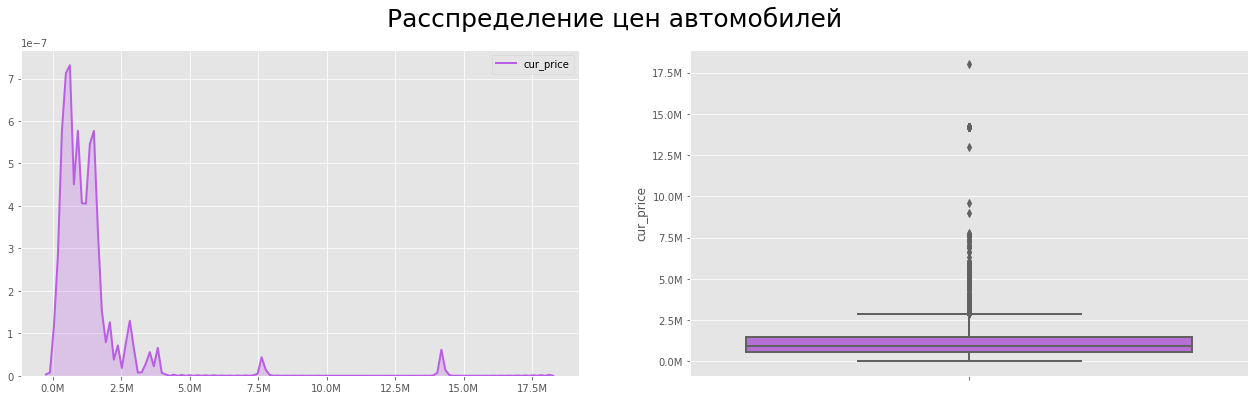

In [694]:
print(f'Медианная стоимость машин составила {int(dt.cur_price.median())}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

plt.subplot(1,2,1)
ax = sns.kdeplot(dt.cur_price, shade=True, color = colors['cur_price'])
_ = ax.xaxis.set_major_formatter(fmtr)

plt.subplot(1,2,2)
ax = sns.boxplot(y=dt.cur_price, color = colors['cur_price'])
_ = ax.yaxis.set_major_formatter(fmtr)

fig.suptitle("Расспределение цен автомобилей",fontsize=25)
plt.show()

Распределение цен слишком сильно смещено влево, поэтому есть смысл далее исследовать их логарифмы

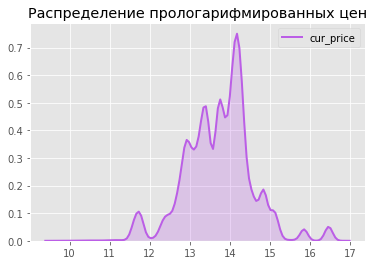

In [695]:
sns.kdeplot(np.log(dt.cur_price), shade=True, color = colors['cur_price'])
plt.title('Распределение прологарифмированных цен')
plt.show()

Посмотрим на распределения категориальных признаков и их связь с ценами машин

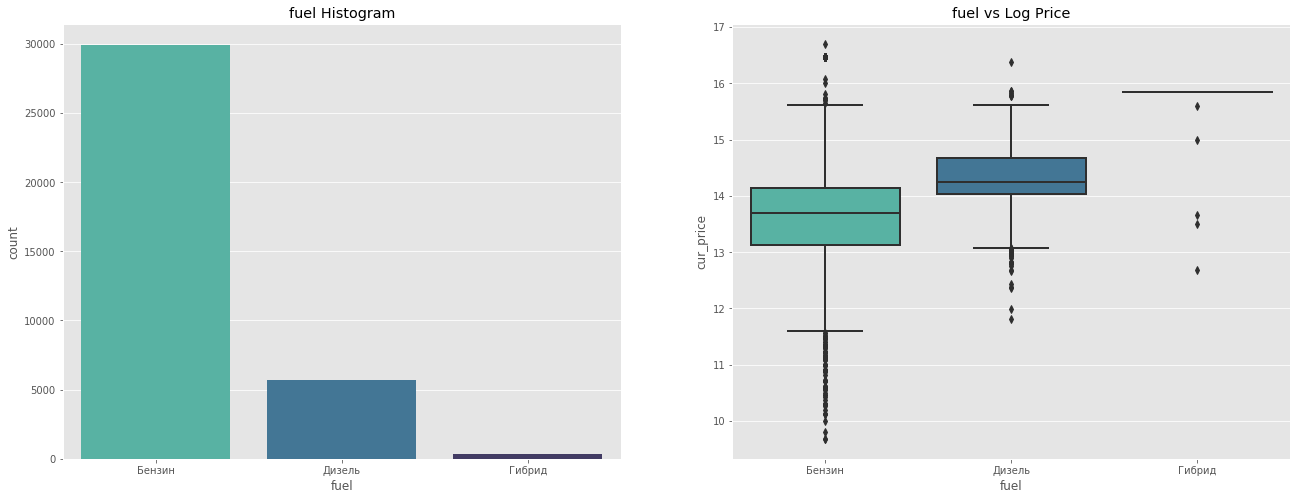

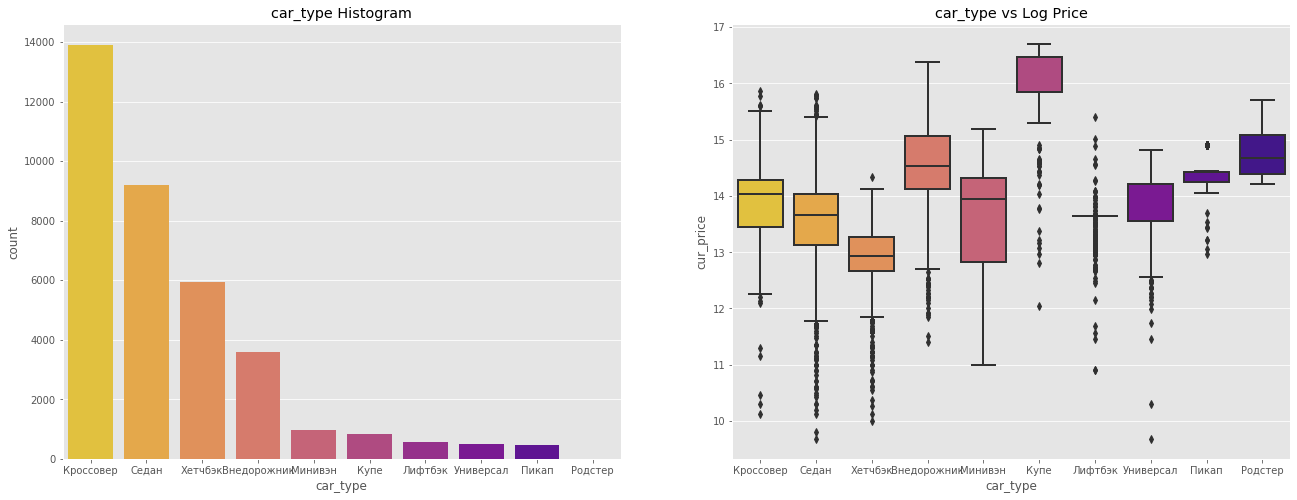

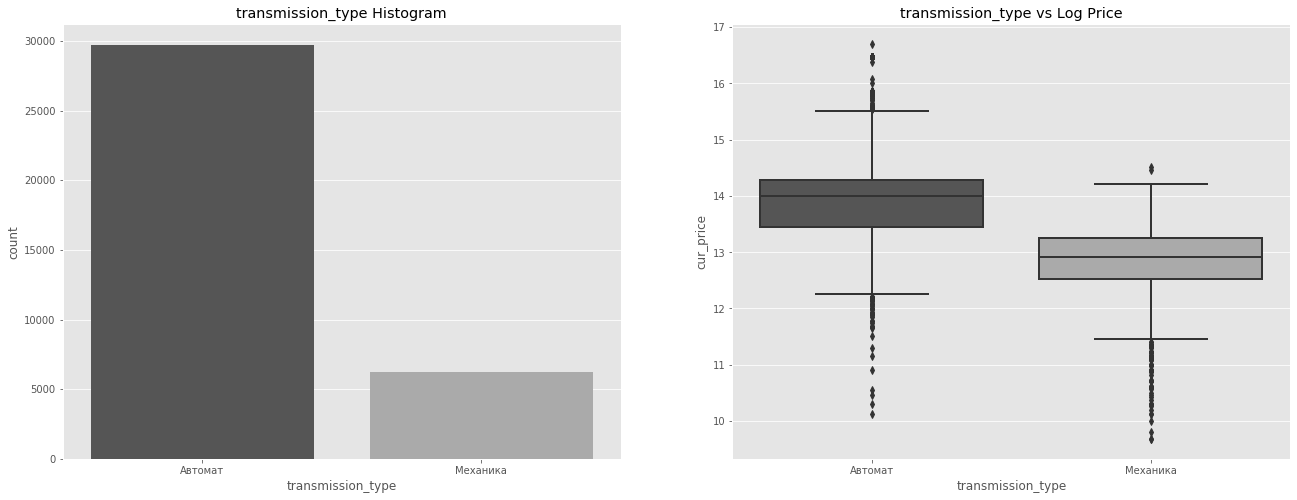

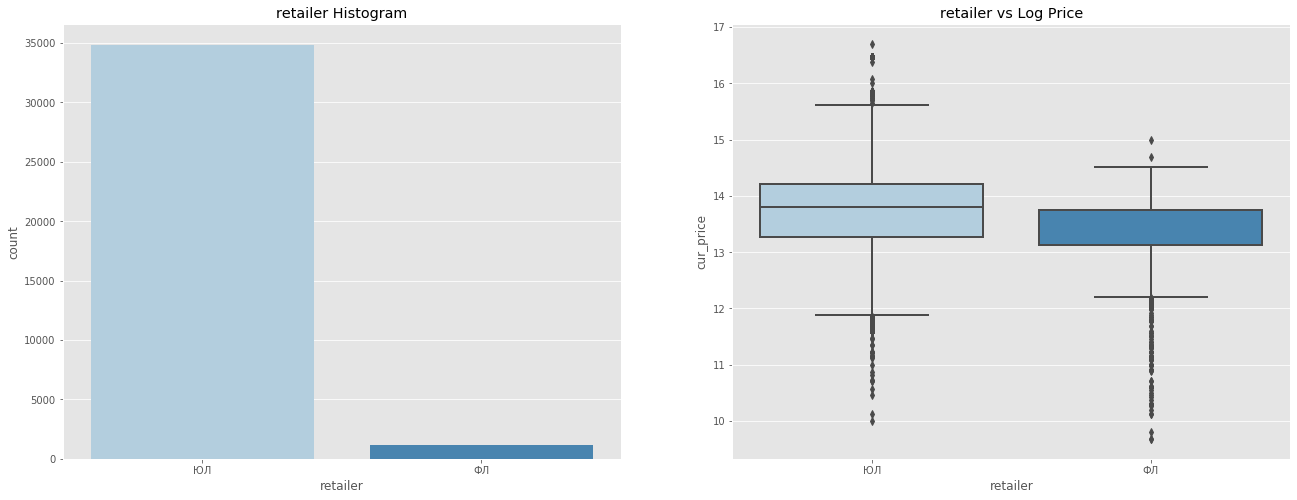

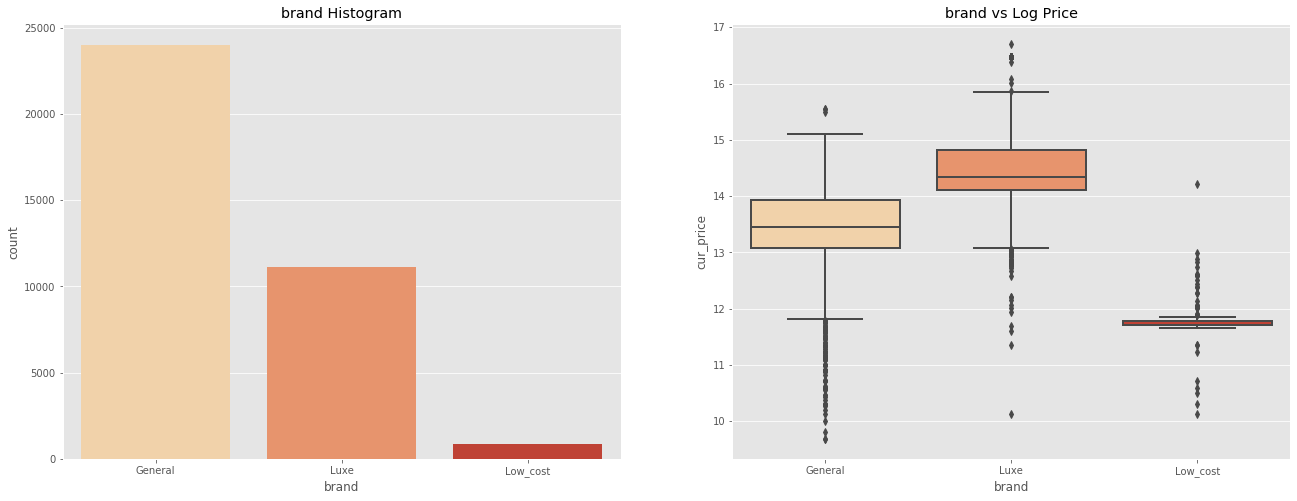

In [696]:
categorical_columns = dt.columns[dt.dtypes == 'object']

for column in categorical_columns:
    
    columne_most_freq = dt[column].value_counts()[:10].sort_values(ascending=False).index
    
    if '' in columne_most_freq:
        columne_most_freq = columne_most_freq.drop('')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))    
    
    plt.subplot(1,2,1)
    plt.title(f'{column} Histogram')
    sns.countplot(
            dt[dt[column].isin(columne_most_freq)][column],
            order=columne_most_freq,
            palette=colors[column]
    )

    plt.subplot(1,2,2)
    plt.title(f'{column} vs Log Price')
    ax = sns.boxplot(
            x=dt[dt[column].isin(columne_most_freq)][column], 
            y=np.log(dt[dt[column].isin(columne_most_freq)].cur_price), 
            order=columne_most_freq,
            palette=colors[column]
    )

    plt.show()

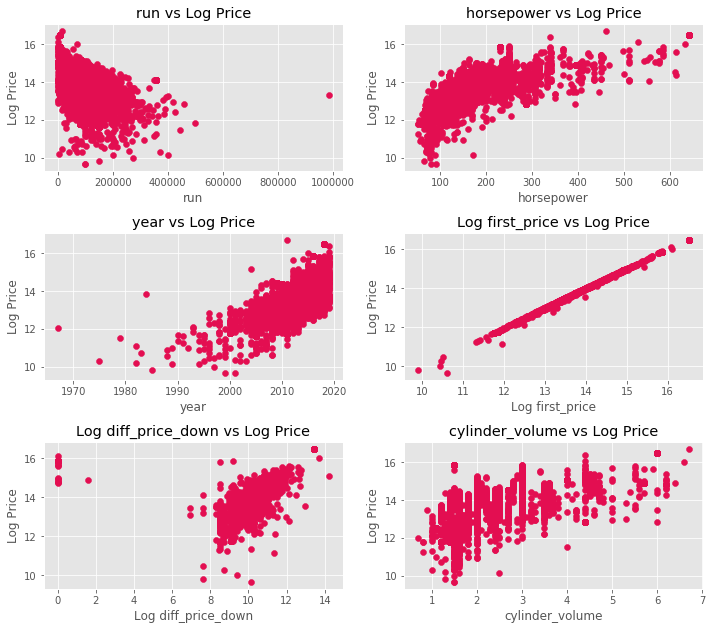

In [697]:
def scatter(column,fig):
    plt.subplot(7,2,fig)
    ax = plt.scatter(
        x=[price if 'price' not in column else np.log(price) for price in dt[dt[column] > 0][column]],
        y=np.log(dt[dt[column] > 0].cur_price),
        color = '#e30e51'
    )
    plt.title(f'{column} vs Log Price')
    plt.title(f'{column} vs Log Price' if 'price' not in column else f'Log {column} vs Log Price')
    plt.ylabel('Log Price')
    plt.xlabel(column if 'price' not in column else f'Log {column}')

plt.figure(figsize=(10,20))

numerical_columns = dt.columns[dt.dtypes != 'object'].drop('cur_price')
for i, column in enumerate(numerical_columns):
    scatter(column, i + 1)
plt.tight_layout()

In [707]:
dt['fuel_label']= [dict(zip(['Бензин', 'Дизель', 'Гибрид'], range(3)))[fuel] for fuel in dt.fuel]
dt['transmission_type_label'] = [dict(zip([ 'Механика', 'Автомат'], 
                    range(2)))[transmission_type] for transmission_type in dt.transmission_type]
dt['retailer_label'] = [dict(zip(['ФЛ', 'ЮЛ'], range(2)))[retailer] for retailer in dt.retailer]

Корреляционная матрица, которая позволяет увидить зависимость признаков друг от друга. Самая большая зависимость оказалась между текущей и начальной ценой, что логично, так же размер скидки сильно коррелирует с текущей ценой.

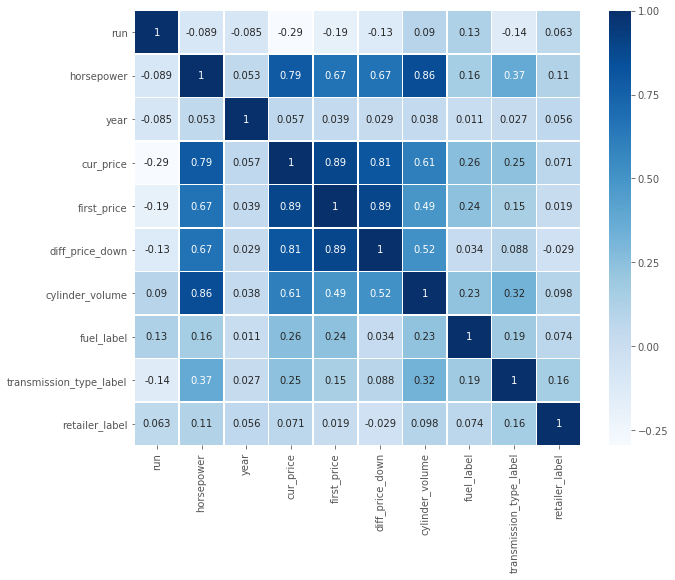

In [699]:
plt.figure(figsize = (10, 8))
sns.heatmap(dt.corr(), annot = True, linewidths=.5, cmap = 'Blues')
plt.show()

## 3. Кластерный анализ

Перейдем к класстерном анализу.  Для этого нам потребуется нормализовать имеющиеся численные данные. Категориальные данные потребуется захэшировать

In [705]:
numerical_columns = dt.columns[dt.dtypes != 'object'].drop(['cur_price', 'first_price', 'diff_price_down'])
numerical_columns

Index(['run', 'horsepower', 'year', 'cylinder_volume', 'brand_label'], dtype='object')

In [706]:
for column in ['run', 'horsepower', 'year']:
    dt.loc[dt[column] < 1, column] = dt[column].mode()[0]


In [351]:
norm = preprocessing.MaxAbsScaler()
norm.fit(dt[numerical_columns])
X_num = norm.transform(dt[numerical_columns])
X_num = pd.DataFrame(X_num, index=dt[numerical_columns].index, columns=dt[numerical_columns].columns)
X_num

,run,horsepower,year,cylinder_volume,fuel_label,transmission_type_label,retailer_label
0,0.1,0.1,1.0,0.2,0.0,0.0,0.0
1,0.2,0.1,1.0,0.2,0.0,0.0,1.0
2,0.1,0.1,1.0,0.2,0.0,0.0,1.0
3,0.1,0.1,1.0,0.2,0.0,0.0,1.0
4,0.2,0.2,1.0,0.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...
35995,0.0,0.3,1.0,0.3,0.5,1.0,1.0
35996,0.1,0.5,1.0,0.7,0.5,1.0,1.0
35997,0.1,0.2,1.0,0.2,0.0,0.0,1.0
35998,0.2,0.3,1.0,0.3,0.5,1.0,1.0


In [352]:
link = linkage(X_num, 'ward', 'euclidean')

In [353]:
link[-20:, 2]

array([  4.28018817,   4.40385046,   5.30314204,   5.39699155,
         5.88203326,   5.95420731,   6.1391084 ,   6.21977288,
         6.72792135,   8.16131534,   8.41699152,  12.25014508,
        13.53405737,  15.59042174,  18.10204213,  23.8356476 ,
        33.33592878,  48.39825652,  52.32233157, 100.46678389])

### Построение дендрограммы

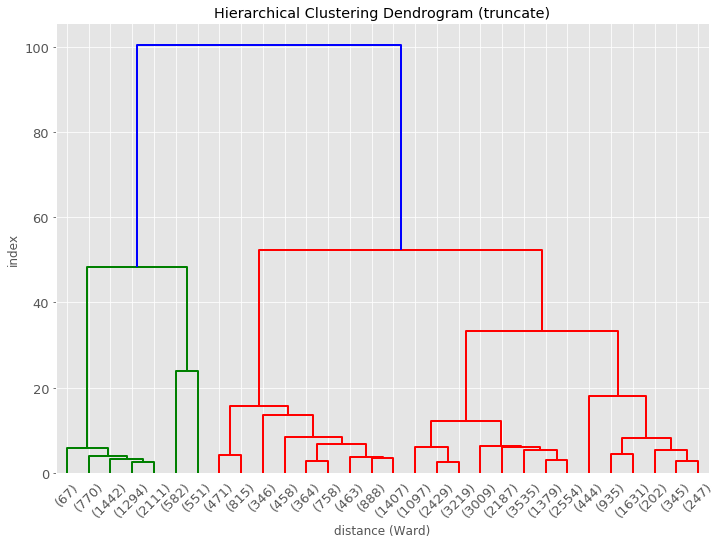

In [354]:
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

dn = dendrogram(
    link,
    labels=X_num.index.tolist(),
    truncate_mode='lastp',
)
ax.tick_params(labelsize=13)
plt.title('Hierarchical Clustering Dendrogram (truncate)')
plt.ylabel('index')
plt.xlabel('distance (Ward)')
plt.show()

### Построение каменистой осыпи

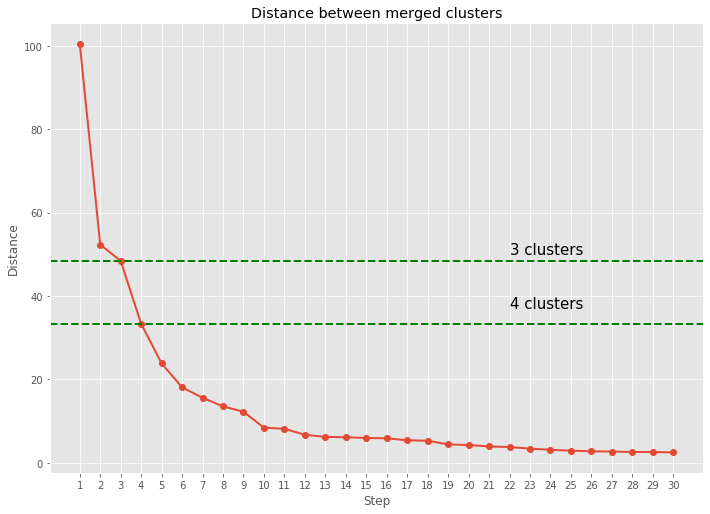

In [355]:
dist = link[-30:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(48.39825652, c='g', linestyle='dashed')
plt.axhline(33.33592878, c='g', linestyle='dashed')
plt.text(22, 50, '3 clusters', size = 15)
plt.text(22, 37, '4 clusters', size = 15)
plt.xticks(np.arange(min(idxs), max(idxs)+1, 1.0))
plt.show()

## Кластеризация методом k-means

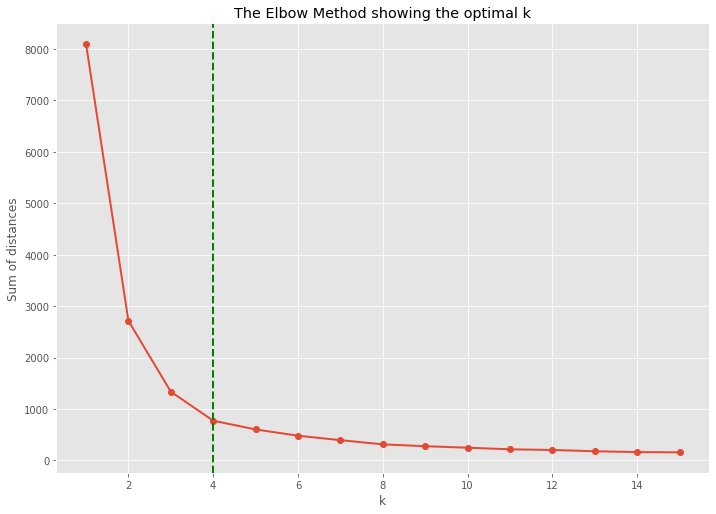

In [356]:
K = range(1, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(X_num.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(4, c='g', linestyle='dashed')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Исходя из построенных диаграмм, понятно, что логично разбить имеющиеся данные о машинах на 4 кластера

In [357]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X_num)
X_num['cluster'] = model.labels_
X_num.groupby('cluster').mean()

,run,horsepower,year,cylinder_volume,fuel_label,transmission_type_label,retailer_label
cluster,,,,,,,
0,0.1,0.3,1.0,0.3,0.0,1.0,1.0
1,0.1,0.2,1.0,0.2,0.0,0.0,1.0
2,0.1,0.3,1.0,0.4,0.5,1.0,1.0
3,0.1,0.2,1.0,0.3,0.0,0.5,0.0


In [358]:
X_num.groupby('cluster').size()

cluster
0    23213
1     5684
2     5971
3     1132
dtype: int64

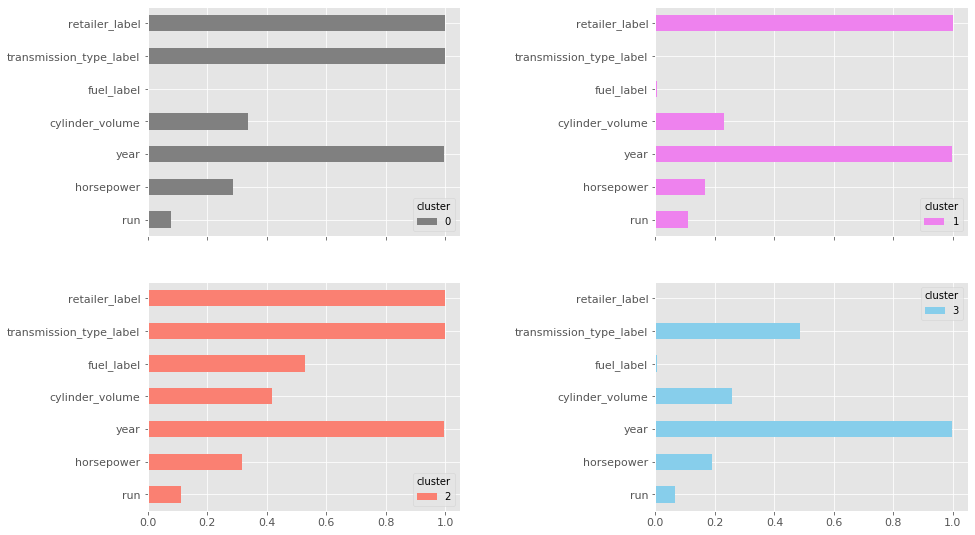

In [359]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        X_num[X_num.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

### Выводы по кластерному анализу 


Кластеры 0, 1, 2 - это машины, которые продают юридические лица. Для них всех важно, чтобы машина была новой. Различаются они только:

- Кластер label = 0 - Характеризует машины с автоматической коробкой передач на бензине с небольшим пробегом и с объемом цилиндра ниже среднего

- Кластер label = 1 - Включает в себя машины с большим пробегом, чем в кластере 0, c меньшим количеством лошадиных сил, с меньшим объемом цилиндров. Но главное отличие в том, что это авто с механической коробкой передач.

- Кластер label = 2 - Включает в себя машины на автомате, которые используют дизель или гибрид, с большим количеством лошадиных сил, с большим объемом цилиндров. 

- Кластер label = 3 - Характеризует машины, которые продают физ. лица (retailer = 0). У таких предложений самым важным фактором является новизна авто. Половина машин в этом кластре - это механика, остальные - автома. Тип топлива - бензин

In [700]:
# dt = dt.drop(['fuel_label', 'transmission_type_label',
#        'retailer_label'], axis = 1)

## 4. Построение регресси справедливой цены автомобиля по представленным признакам

In [519]:
from sklearn.metrics import mean_squared_error

In [701]:
dt['brand_label'] = [dict(zip(['Low_cost', 'General', 'Luxe'], range(3)))[brand] for brand in dt.brand]

In [708]:
dt

,run,fuel,horsepower,year,car_type,transmission_type,retailer,cur_price,first_price,diff_price_down,brand,cylinder_volume,brand_label,fuel_label,transmission_type_label,retailer_label
0,105000.0000,Бензин,81,2008,Хетчбэк,Механика,ФЛ,40000,0,0,General,1.6000,1,0,0,0
1,240000.0000,Бензин,86,2008,Седан,Механика,ЮЛ,96000,0,0,General,1.5000,1,0,0,1
2,60000.0000,Бензин,81,2011,Хетчбэк,Механика,ЮЛ,190000,0,0,General,1.6000,1,0,0,1
3,137807.0000,Бензин,64,1983,Седан,Механика,ЮЛ,45000,0,0,General,1.2000,1,0,0,1
4,157000.0000,Бензин,129,2007,Седан,Механика,ФЛ,59999,0,0,General,2.0000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,15520.0000,Дизель,180,2018,Кроссовер,Автомат,ЮЛ,2350000,2450000,100000,Luxe,2.0000,2,1,1,1
35996,84893.0000,Дизель,339,2016,Внедорожник,Автомат,ЮЛ,3813740,0,0,Luxe,4.4000,2,1,1,1
35997,104705.0000,Бензин,105,2010,Кроссовер,Механика,ЮЛ,545000,0,0,General,1.2000,1,0,0,1
35998,166136.0000,Дизель,184,2013,Кроссовер,Автомат,ЮЛ,720000,730000,10000,General,2.2000,1,1,1,1


In [709]:
X = dt.drop(['cur_price', 'fuel','car_type',  'transmission_type','first_price', 'diff_price_down',
       'retailer', 'brand'], axis=1).get_values()
y = np.log(dt['cur_price']).get_values()

/Users/bazyleva-alex/PycharmProjects/учеба/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  
/Users/bazyleva-alex/PycharmProjects/учеба/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [710]:
import statsmodels.api as sm
#линейная регрессия
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.096e+06
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:47:55   Log-Likelihood:                         -12916.
No. Observations:               36000   AIC:                                  2.585e+04
Df Residuals:                   35992   BIC:                                  2.592e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [711]:
def find_prediction_at_instance_for_ols(X, params, instance):
    return sum([val*X[instance, i].sum() for i, val in enumerate(params[:-1])])

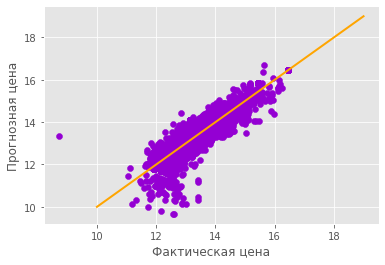

In [712]:
fig.set_size_inches(18.5, 10.5)
plt.scatter(
    [find_prediction_at_instance_for_ols(X, est.params, i) for i in range(X.shape[0])],
    np.log(dt.cur_price),
    color = 'darkviolet')
plt.plot(list(range(10, 20)),list(range(10, 20)), c = 'orange')
plt.xlabel(u'Фактическая цена')
plt.ylabel(u'Прогнозная цена')
plt.show()

In [713]:
print (f'R^2: {est.rsquared_adj}')

R^2: 0.9993662481766545


In [714]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [715]:
results_ols = pd.DataFrame()
results_ols['feature'] = ['run', 'horsepower', 'year', 
       'cylinder_volume', 'fuel_label', 'transmission_type_label',
       'retailer_label', 'brand_label']
results_ols['coefs'] = est.params
results_ols['p_value'] = est.pvalues
results_ols

,feature,coefs,p_value
0,run,-0.0000,0.0000
1,horsepower,0.0042,0.0000
2,year,0.0061,0.0000
3,cylinder_volume,0.0460,0.0000
4,fuel_label,0.3881,0.0000
5,transmission_type_label,0.4651,0.0000
6,retailer_label,0.3898,0.0000
7,brand_label,0.0799,0.0000


Полученные коэффиценты означают следующее:
- Текущая цена автомобиля в основном зависит от типа коробки передач, ритейлера и типа топлива 
- Так же параметры, которые хоть и не так значительно, но все-таки влиют на цену - это бренд, объем цилиндров, год выпуска и количество лошадиных сил.

Полученную модель модель модно использовать как калькулятор предположительной цены автомобиля. Это полезно для первичной оценки стоимости продаваемого авто.

Рассмотрим пример предсказания цены авто со следующими характеристиками

In [736]:
new_offer = {
    'run' : 70000, 
    'horsepower': 70,
    'year': 2014, 
    'cylinder_volume' : 2, 
    'fuel_label': 0, #Бензин 
    'transmission_type_label': 1, #Автомат
    'retailer_label' : 1, #Юридеческое лицо
    'brand_label' : 1 #General
}

In [764]:
log_price = 0
for i, val in enumerate(est.params):
    log_price += list(new_offer.values())[i]*val
log_price, np.exp(log_price)

(13.321557463718007, 610209.4047514787)

Посмотрим на примеры построенных прогнозов цен моделью OLS

In [738]:
prediction = pd.DataFrame()
prediction['pred'] = est.predict(X)
prediction['fact'] = y

In [739]:
prediction.sample(17).T

,18553,33370,11341,5828,1918,31954,19076,11986,24057,31747,6406,26428,31768,28989,10746,28407,31110
pred,14.8365,13.4319,14.4134,14.7684,13.4835,15.2821,13.7474,14.2472,13.6987,13.8496,13.0850,13.3403,12.7009,14.4215,14.2472,13.4319,14.5318
fact,14.6699,13.0795,14.2143,14.8733,13.6877,15.1541,13.4870,14.2176,14.1267,14.5334,13.3212,12.9945,12.8866,14.2143,14.2176,13.0795,14.3402


Линейная модель полученная методом OLS показала отличные результаты. 
Заметим, что переменная с типом ритейлера оказалась статистически незначимой, поэтому стоит исключить ее из рассмотрения.
Воспользуемся еще методами Lasso и Ridge для сравнения результатов.

In [754]:
X = dt.drop(['cur_price', 'fuel','car_type',  'transmission_type', 'first_price', 'diff_price_down',
       'retailer', 'brand', 'retailer_label'], axis=1).get_values()
y = np.log(dt['cur_price']).get_values()

/Users/bazyleva-alex/PycharmProjects/учеба/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  
/Users/bazyleva-alex/PycharmProjects/учеба/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [755]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

In [756]:
lasso_regressor = Lasso(random_state = 1)
lasso_regressor.fit(X, y)
lasso_predictions = lasso_regressor.predict(X)

In [757]:
rmse = np.sqrt(mean_squared_error(y, lasso_predictions.astype(int))).round(2)
print(f'RMSE = {rmse}')

RMSE = 0.78


In [758]:
score = lasso_regressor.score(X, y)
print('R^2 = {}'.format(score))

R^2 = 0.648261610847472


In [759]:
results_lasso= pd.DataFrame()
results_lasso['feature'] = ['run', 'horsepower', 'year',
       'cylinder_volume', 'fuel_label', 'transmission_type_label',
        'brand_label', 'intercept']
results_lasso['coefs'] = [*lasso_regressor.coef_, lasso_regressor.intercept_]

results_lasso

,feature,coefs
0,run,-0.0000
1,horsepower,0.0070
2,year,0.0000
3,cylinder_volume,0.0000
4,fuel_label,0.0000
5,transmission_type_label,0.0000
6,brand_label,0.0000
7,intercept,12.9168


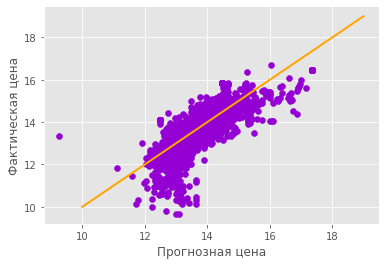

In [760]:
fig.set_size_inches(18.5, 10.5)
plt.scatter(
    [find_prediction_at_instance_for_ols(X, lasso_regressor.coef_, i) + lasso_regressor.intercept_   
     for i in range(X.shape[0])],
    np.log(dt.cur_price),
    color = 'darkviolet')
plt.plot(list(range(10, 20)),list(range(10, 20)), c = 'orange')
plt.xlabel(u'Прогнозная цена')
plt.ylabel(u'Фактическая цена')
plt.show()

In [761]:
prediction = pd.DataFrame()
prediction['pred'] = lasso_regressor.predict(X)
prediction['fact'] = y

In [762]:
prediction.sample(17).T

,26243,3590,5216,12224,33182,32369,27134,5927,26000,18960,9556,5985,11549,4353,31097,11248,20886
pred,13.8835,12.7857,12.7299,13.5051,13.7160,13.5574,13.5581,13.8150,13.7241,14.1514,13.1727,13.6976,13.8661,13.7057,13.5581,13.5383,13.0613
fact,13.9970,12.9239,11.7753,13.4284,14.3456,13.4075,13.7046,14.0832,13.6647,14.2143,12.9239,13.7267,14.1697,14.0306,13.7046,13.3212,12.8866


In [763]:
new_offer = {
    'run' : 70000, 
    'horsepower': 70,
    'year': 2014, 
    'cylinder_volume' : 2, 
    'fuel_label': 0, #Бензин 
    'transmission_type_label': 1, #Автомат
    'retailer_label' : 1, #Юридеческое лицо
    'brand_label' : 1 #General
}
log_price = 0
for i, val in enumerate([*lasso_regressor.coef_, lasso_regressor.intercept_]):
    log_price += list(new_offer.values())[i]*val
log_price, np.exp(log_price)

(13.087817216057108, 483021.8723882427)

Это метод явно хуже OLS, это можно понять не только по R^2, но и по подобранным значениям переменных

In [765]:
ridge_regressor = Ridge(random_state = 1)
ridge_regressor.fit(X, y)
ridge_predictor = ridge_regressor.predict(X)

In [766]:
score = ridge_regressor.score(X, y)
print('R^2 = {}'.format(score))

R^2 = 0.8831222615361177


In [769]:
results_ridge= pd.DataFrame()
results_ridge['feature'] = ['run', 'horsepower', 'year',
       'cylinder_volume', 'fuel_label', 'transmission_type_label',
        'brand_label', 'intercept']
results_ridge['coefs'] = [*ridge_regressor.coef_, ridge_regressor.intercept_]

results_ridge

,feature,coefs
0,run,-0.0000
1,horsepower,0.0041
2,year,0.0882
3,cylinder_volume,0.0396
4,fuel_label,0.3633
5,transmission_type_label,0.3927
6,brand_label,0.3356
7,intercept,-165.4372


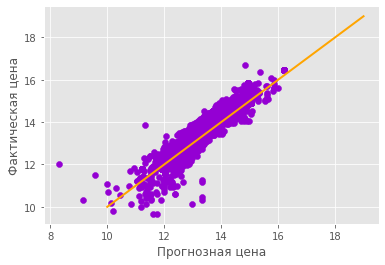

In [770]:
fig.set_size_inches(18.5, 10.5)
plt.scatter(
    [find_prediction_at_instance_for_ols(X, ridge_regressor.coef_, i) + ridge_regressor.intercept_   
     for i in range(X.shape[0])],
    np.log(dt.cur_price),
    color = 'darkviolet')
plt.plot(list(range(10, 20)),list(range(10, 20)), c = 'orange')
plt.xlabel(u'Прогнозная цена')
plt.ylabel(u'Фактическая цена')
plt.show()

In [771]:
prediction = pd.DataFrame()
prediction['pred'] = ridge_regressor.predict(X)
prediction['fact'] = y

In [772]:
prediction.sample(17).T

,4388,13875,26607,33300,408,16707,16815,23961,25216,9519,12397,16061,3828,8716,27613,18210,1404
pred,14.8260,13.9636,13.1057,13.7934,13.4387,14.1179,13.7527,13.7909,13.1416,14.6613,15.2758,12.7367,13.6191,12.9065,13.9514,13.1057,13.0299
fact,14.8733,14.2792,13.0795,13.8785,13.5911,14.2176,13.9509,13.6647,12.6729,14.4447,15.8502,12.8347,13.8402,12.9239,13.7429,13.0795,12.9215


In [773]:
new_offer = {
    'run' : 70000, 
    'horsepower': 70,
    'year': 2014, 
    'cylinder_volume' : 2, 
    'fuel_label': 0, #Бензин 
    'transmission_type_label': 1, #Автомат
    'retailer_label' : 1, #Юридеческое лицо
    'brand_label' : 1 #General
}
log_price = 0
for i, val in enumerate([*ridge_regressor.coef_, ridge_regressor.intercept_]):
    log_price += list(new_offer.values())[i]*val
log_price, np.exp(log_price)

(13.271719718303842, 580543.329082654)

Метод Ridge показал хорошие результаты, но OLS все-таки оказался лучше.

# Выводы
В рамках проведенной работы были собраны данные о продаваемых машинах. У каждого автомобиля были определены следующие параметры:
- Пробег автомобиля
- Тип топлива
- Количество лошадиных сил
- Год выпуска
- Тип коробки передач
- Ритейлер
- Бренд
- Объем цилиндров
- Текущая цена в объявлении о продаже

Собранные данные были приведены к необходимому для анализа виду. 

Были построены графики, которые помогли понять природу и количество данных и зависимость данных друг от друга.

Данные были кластеризованы методом Kmeans. Количество выделенных кластеров - 4. В первые три кластера попали машины, продаваемые юридическими лицами, различия кластеров в типе коробки передач и топлива. 4 кластер образовали машины, продаваемые физическими лицами.

К имеющимся данным была применена линейная регрессия для предсказания цены автомобиля по имеющимся параметрам. Были рассмотренны три модели: OLS, Lasso, Ridge. Лучше всех показала себя модель OLS. Полученные коэффициенты в модели говорят нам о том, что главные факторы, влияющие на цену автомобиля - это бренд, топ топлива и тип коробки передач